
<img src="https://img.kaikeba.com/web/hcTech/img_logo.png" alt="图片替换文本" width="500" height="150" align="bottom" />

# Lesson-01 Assignment

   各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们课程的完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。

## 本次作业的内容

### 1. Recode all examples;

### 2. Please answer some questions about our course. We do appreciate your help.

   2.1  What do you want to get in this course? 

Answer: Knowledge of artificial intelligence and improvement on my coding capacity .

2.2 What problems do you want to solve? 

Answer:Skeleton based action recognition and GCN.

 2.3 What advantages do you have to accomplish your goal?

Answer:Basic coding capacity.

 2.4 What disadvantages you need to overcome to accomplish your goal?

Answer:Lack of knowledge about artificial intelligence.

2.5 How will you plan to study in this course? 

Answer:Algorithm.

邮箱地址：ymzhang@kaikeba.com  

### 3. 如何提交
提交github地址 或者 提交压缩包到学习平台

### 4.  理论题
- 4.1 图像有几个通道，通道分别是什么颜色？
三通道，RGB
- 4.2 图像由 cv2.imread 读取，通道按什么顺序？
BGR
- 4.3 阐述卷积可以干什么？以及图像卷积的过程？（可以图示）
卷积：提取图像特征。
数字图像是一个二维的离散信号，对数字图像做卷积操作其实就是利用卷积核（卷积模板）在图像上滑动，将图像点上的像素灰度值与对应的卷积核上的数值相乘，然后将所有相乘后的值相加作为卷积核中间像素对应的图像上像素的灰度值，并最终滑动完所有图像的过程。 
- 4.4 numpy中的np.vstack和np.hstack的区别？（可以代码展示）
np.vstack:按垂直方向（行顺序）堆叠数组构成一个新的数组
np.hstack:按水平方向（列顺序）堆叠数组构成一个新的数组

### 5. 完成以下问答和编程练习

5.1.1  请先实现这些函数 **image crop, rotation, Affine Transformand perspective transform** , 记得设置函数的参数。

5.1.2  拓展题：同学可以进一步定义一个函数 **image_color_shift**，将图像的三个通道的像素值，加上一个随机值或者减去一个随机值(假设是正值)。需要注意的是图像的像素值是0-255。



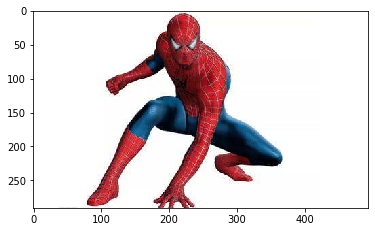

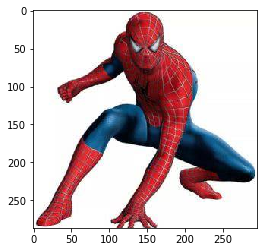

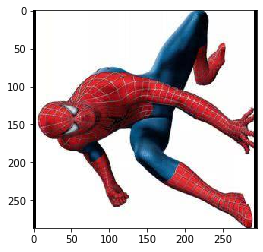

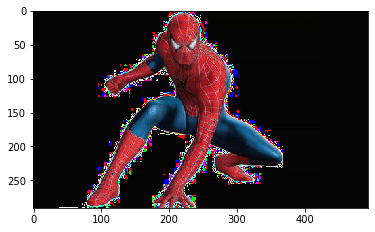

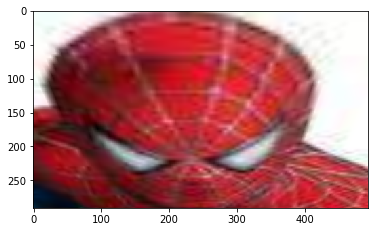

In [42]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
class ImageTransformer:

    def image_crop(self,img,up,left,below,right):
        new_img = img[up:below,left:right,:]     
        return new_img


    def rotation(self,img,aug_value, scale): # your code here
        shape=img.shape
        M= cv2.getRotationMatrix2D((0.5*shape[1], 0.5*shape[0]), aug_value, scale)
        new_img = cv2.warpAffine(img, M, (shape[1], shape[0]))
        return new_img
    
    def perspective_transform(self,img,pst1,pst2): # your code here
        M = cv2.getPerspectiveTransform(pts1,pts2)
        new_img = cv2.warpPerspective(img,M,(img.shape[1],img.shape[0]))
        return new_img

    def image_color_shift(self,img):
        rand = random.randint(-100, 100) 
        new_img=img+rand
        for i in range(len(img)):
            for j in range(len(img[0])):
                for k in range(3):
                    if img[i][j][k]<0:
                        img[i][j][k]=0
                    elif img[i][j][k]>255:
                        img[i][j][k]=255
        
        return new_img
        
if __name__ =="__main__":
    
    transformer = ImageTransformer()
    img = cv2.imread('spider.jpeg') # your image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    #crop
    new_img = transformer.image_crop(img,3,75,290,370)
    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
    plt.show()
    #rotation
    new_img = transformer.rotation(new_img,90,1)
    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
    plt.show()
    #color shift
    new_img = transformer.image_color_shift(img)
    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
    plt.show()
    rows,cols = img.shape[:2]
    pts1 = np.float32([[180,80],[270,80],[200,5],[250,5]])
    pts2 = np.float32([[0,rows],[cols,rows],[0,0],[cols,0]])
    new_img = transformer.perspective_transform(img,pts1,pts2)
    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    

各位同学，你已经把课上关于图像增广实现了！

5.2  请实现一个图像的前景放在另一个图像上面。

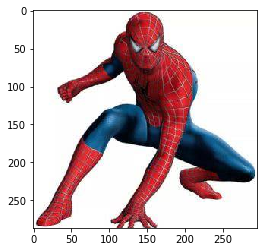

(287, 295)


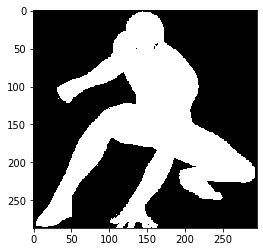

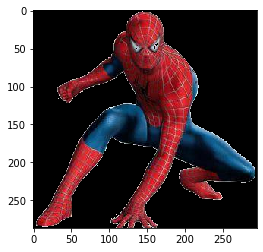

In [50]:
import cv2
import random
import numpy as np

# your code here
img = cv2.imread('spider.jpeg') # your image
new_img = transformer.image_crop(img,3,75,290,370)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()
img_hsv = cv2.cvtColor(new_img, cv2.COLOR_BGR2HSV)       # 转换成hsv色彩风格
mask = cv2.inRange(img_hsv, 
                    (0, 0, 221), 
                    (180, 30, 255)
                  )   # 利用inRange产生mask
print(mask.shape)
mask1 = cv2.bitwise_not(mask)
plt.imshow(mask1, cmap='gray')
plt.show()
person = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
person_and_mask1 = cv2.bitwise_and(person, person, mask=mask1)
plt.imshow(person_and_mask1)
plt.show()

(287, 295, 3)
(287, 205)
(44, 500)
(331, 500)


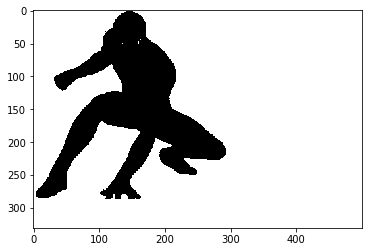

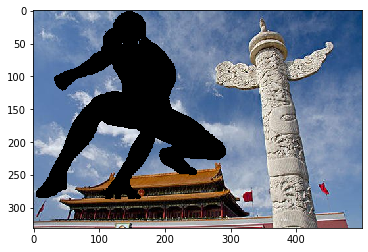

(331, 500, 3)


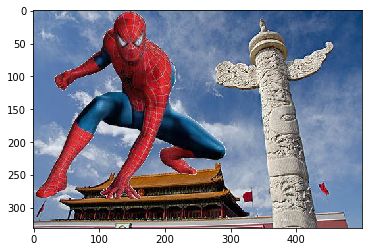

In [65]:
print(person.shape)
palace= cv2.imread('Palace.jpg') # your image
palace_rgb = cv2.cvtColor(palace, cv2.COLOR_BGR2RGB)
array = np.uint8(np.full((person.shape[0],palace_rgb.shape[1]-person.shape[1]),255))
varray = np.uint8(np.full((palace_rgb.shape[0]-person.shape[0],palace_rgb.shape[1]),255))
print(array.shape)
print(varray.shape)
new_mask=np.vstack((np.hstack((mask,array)),varray))
print(new_mask.shape)
plt.imshow(new_mask, cmap='gray')
plt.show()
img_and_new_mask = cv2.bitwise_and(palace_rgb, palace_rgb, mask=new_mask)
plt.imshow(img_and_new_mask)
plt.show()

array1 = np.uint8(np.full((person.shape[0],palace_rgb.shape[1]-person.shape[1],3),0))
varray1 = np.uint8(np.full((palace_rgb.shape[0]-person.shape[0],palace_rgb.shape[1],3),0))
person_and_mask2 = np.vstack((np.hstack((person_and_mask1, array1)),varray1))
print(person_and_mask2.shape)
person_and_img = person_and_mask2 + img_and_new_mask
plt.imshow(person_and_img)
plt.show()

各位同学，你已经把图像的感兴趣区域提取了，并且实现了图像融合！

这次的作业就到这里了！祝大家学习进步！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)